In [1]:
import numpy as np
import scipy
from scipy import misc
import matplotlib.pyplot as plt

# page 102 - translate image

/Users/zeev/.virtualenvs/science/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


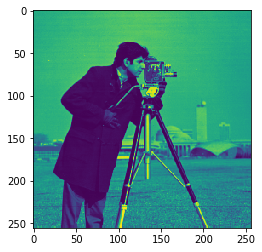

In [2]:
im = misc.imread('../data/cameraman.tiff')
plt.imshow(im)

In [3]:
def transgl(pixel):
    if 0 <= pixel < 75:
        return int(0 + (30 - 0)*(pixel/75))
    if 75 <= pixel <= 180:
        return int(30 + (230 - 30 + 1)*((pixel - 75) / (180 - 75 + 1)))
    if 180 < pixel <= 255:
        return int(231 + (255 - 230)*((pixel - 181) / (255 - 180)))

In [4]:
def translate_img(img_path):
    img = misc.imread(img_path)
    w, h = img.shape
    translated_img = np.zeros(img.shape)
    for i in range(0, w-1):
            for j in range(0, h-1):
                translated_img[i, j] = transgl(img[i, j])
    return translated_img

/Users/zeev/.virtualenvs/science/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


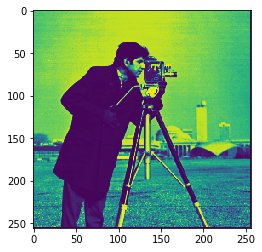

In [5]:
tim = translate_img('../data/cameraman.tiff')
plt.imshow(tim)

# page 103 - gray-level histogram 

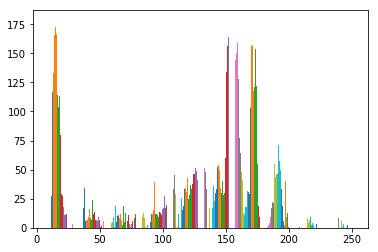

In [17]:
n, _m, _ = plt.hist(im)

 # page 104 - histogram equalization 

In [11]:
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

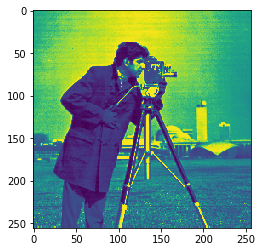

In [12]:
him, _ = image_histogram_equalization(im)
plt.imshow(him)

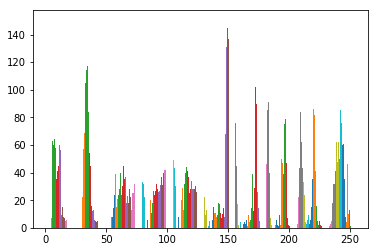

In [78]:
n, _m, _ = plt.hist(him)

# page 117 - gaussian filter 

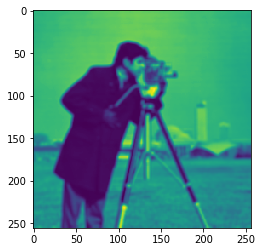

In [81]:
s = 2 # sigma
w = 5 # window size
t = (((w - 1)/2)-0.5)/s # evaluate the 'truncate' value
filtered_data = scipy.ndimage.filters.gaussian_filter(im, sigma=s, truncate=t)
plt.imshow(filtered_data)

# page 122 - logical operations

In [82]:
A = np.zeros((100,100))
B = np.zeros((100,100))

In [119]:
A[48:52, 20:80] = 1
B[20:80, 48:52] = 1
C = np.logical_or(A, B)
D = np.logical_and(A, B)
E = np.logical_not(A)
F = np.logical_xor(A, B)

Text(0.5,1,'XOR')

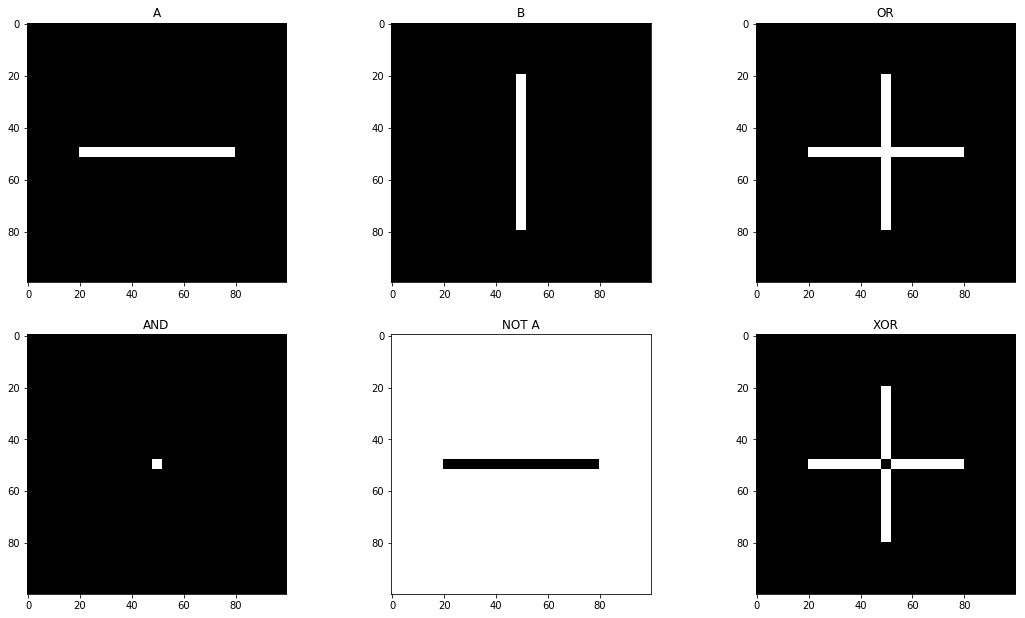

In [122]:
f, ax = plt.subplots(2, 3)
plt.gray()
f.set_size_inches(18.5, 10.5)

ax[0, 0].imshow(A)
ax[0, 0].set_title('A')

ax[0, 1].imshow(B)
ax[0, 1].set_title('B')

ax[0, 2].imshow(C)
ax[0, 2].set_title('OR')

ax[1, 0].imshow(D)
ax[1, 0].set_title('AND')

ax[1, 1].imshow(E)
ax[1, 1].set_title('NOT A')

ax[1, 2].imshow(F)
ax[1, 2].set_title('XOR')

# page 124 - binary_dilation, binary_erosion, binary_opening, binary_closing

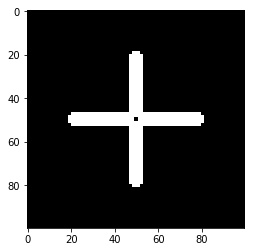

In [188]:
from scipy.ndimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing
plt.imshow(binary_dilation(F))

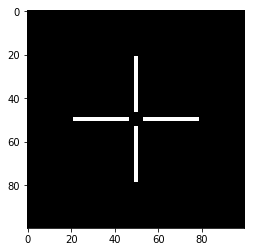

In [128]:
plt.imshow(binary_erosion(F))

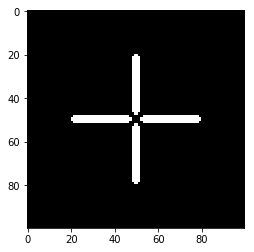

In [132]:
plt.imshow(binary_opening(F))

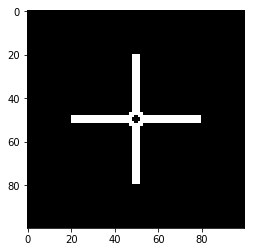

In [134]:
plt.imshow(binary_closing(F))